# The start of Computer Vision

In [3]:
print("Hello World!")

Hello World!


## Starter Code

Best match top left position: (514, 483)
Best match confidence: 0.9811137318611145
found needle


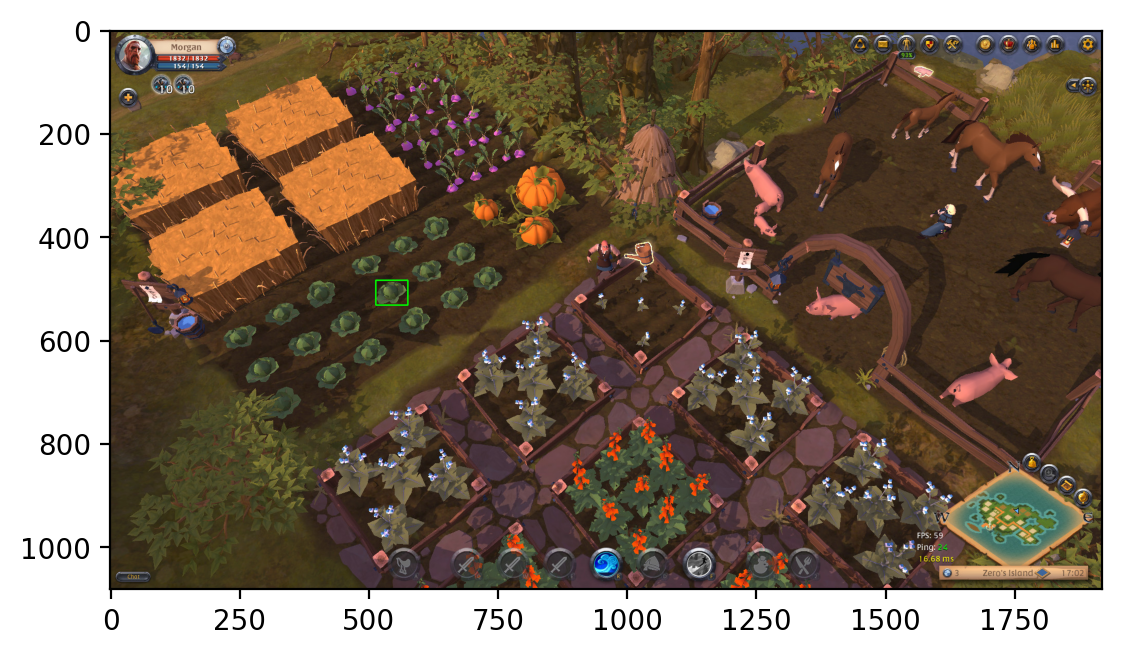

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


haystack_img = cv.imread('albion_farm.jpg', cv.IMREAD_UNCHANGED)  # Main image
needle_img = cv.imread('albion_cabbage.jpg', cv.IMREAD_UNCHANGED)  # Image to search for in the main image

result = cv.matchTemplate(haystack_img, needle_img, cv.TM_CCOEFF_NORMED)

# Get best match position 
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

print(f'Best match top left position: {max_loc}')
print(f'Best match confidence: {max_val}') # Confidence may not be perfect due to .jpg compression

threshold = 0.8
if max_val >= threshold:
    print('found needle')

    # Get dimensions of the needle image
    needle_w = needle_img.shape[1]
    needle_h = needle_img.shape[0]

    top_left = max_loc
    bottom_right = (top_left[0] + needle_w, top_left[1] + needle_h)

    cv.rectangle(haystack_img, top_left, bottom_right,
                 color=(0, 255, 0),
                 thickness=2,
                 lineType=cv.LINE_4)

    plt.figure(dpi=200)  # Increase dpi for higher resolution
    plt.imshow(cv.cvtColor(haystack_img, cv.COLOR_BGR2RGB))
    plt.show()

    cv.imwrite('image_found.jpg', haystack_img)

else:
    print('did not find image')